# Thresholding

A primary step in the pre-processing of images is converting the image to black and white. This is the process of binarization. A simple and effective way to do so is through thresholding. There is simple thresholding, adaptive thresholding, Otsu's thresholding, and a variety of combination of parameters to experiment with.

Firstly, I import the required modules

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

Next, I read the image and display it in RGB, then convert it to grayscale.

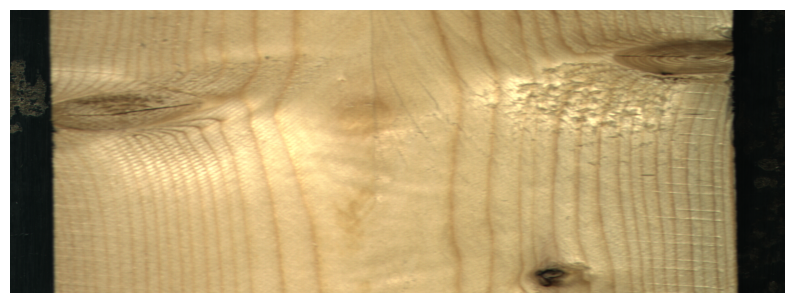

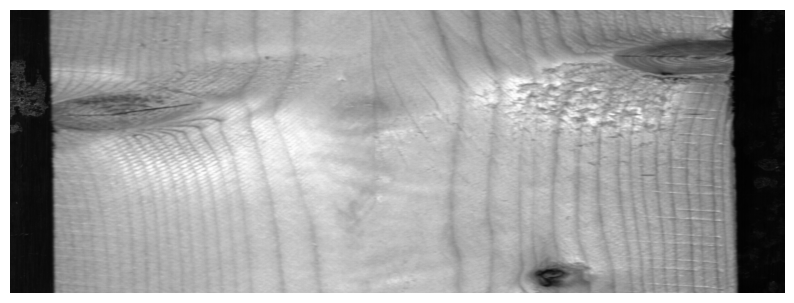

In [19]:
img_path = r'../images/samples/99300070.bmp'

img = cv2.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

plt.figure(figsize=(10,10))
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()

## Simple Thresholding

If pixels fall below the threshold, they are converted to black, and if they are above the threshold, they are converted to white.

### Testing Thresholding Types

In [20]:
#Params: (src, thresh, maxval, thresh_type)
ret,thresh1 = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(gray,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(gray,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(gray,127,255,cv2.THRESH_TOZERO_INV)

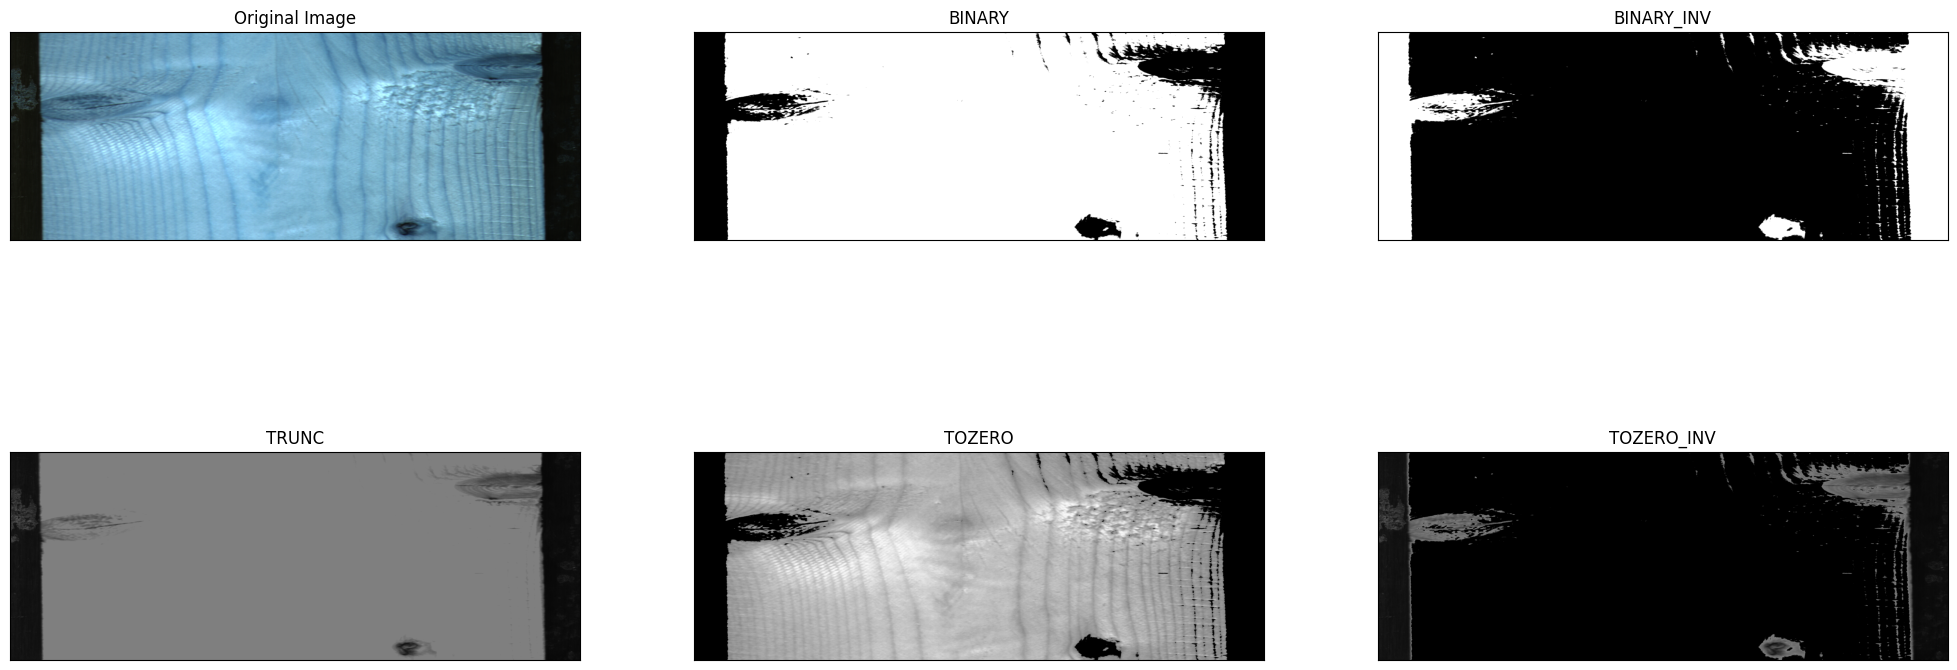

In [21]:
plt.figure(figsize=(25,10))
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

The primary usage of thresholding is to binarize the image, so binary and binary_inv will primarily be used. Note that binary_inv is the proper format for the findContours method (black background, white foreground) but noise reduction techniques generally assume the noise is black.

TRUNC sets the pixel to the threshold if src(x,y) > thresh, and leaves it if < thresh.
TOZERO leaves the pixel if src(x,y) > thresh, and sets to to 0 if < thresh

### Testing Thresholds

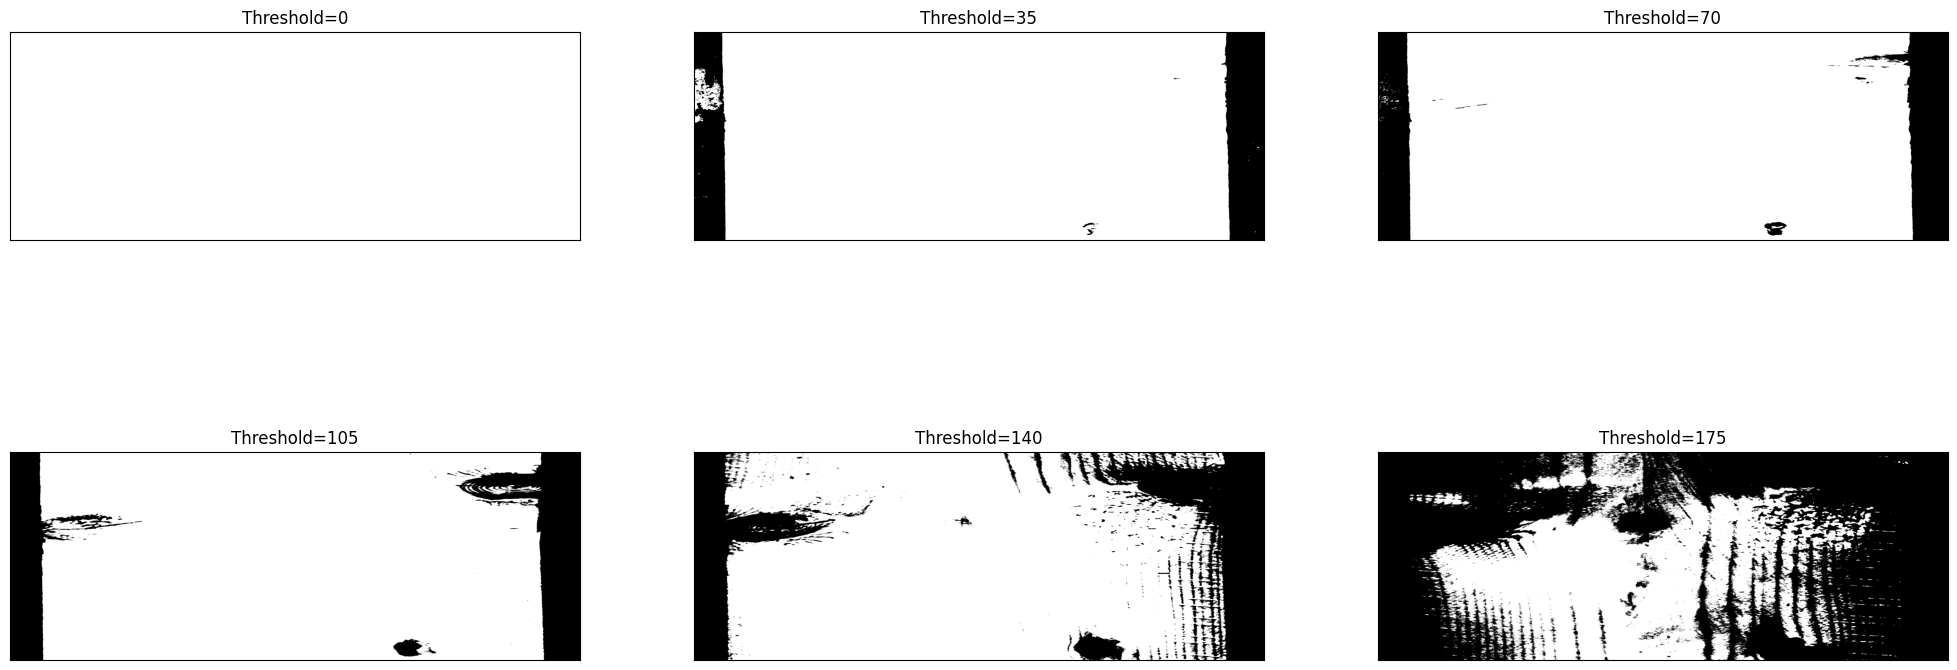

In [22]:
plt.figure(figsize=(25,10))
for i in range(6):
    threshold = 35*i
    ret,thresh = cv2.threshold(gray, threshold, 255, cv2.THRESH_BINARY)
    plt.subplot(2,3,i+1),plt.imshow(thresh,'gray',vmin=0,vmax=255)
    plt.title("Threshold=" + str(threshold))
    plt.xticks([]),plt.yticks([])

plt.show()

The best threshold value appears to span between 100 and 140. Anything below that threshold does not pick up the defects, however anything above picks up way too much noise

## Adaptive Thresholding

Adaptive thresholding involves automatically determining the best thresholding for each an every local area (as a kernel). It is useful when the image has noise of different intensities in varying regions.

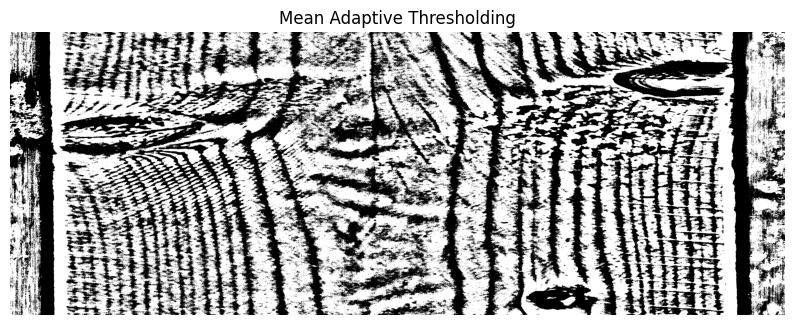

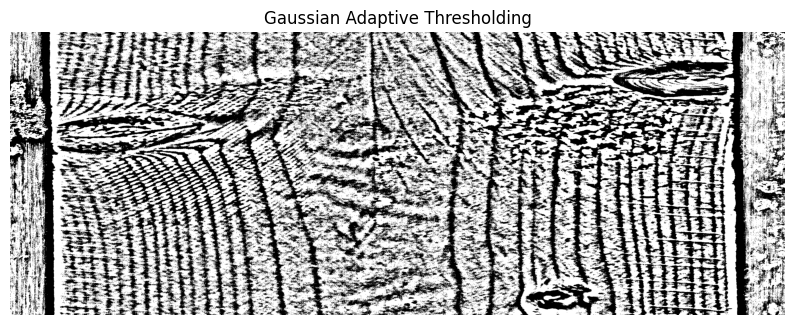

In [23]:
a1_thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,31,2)
a2_thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31,2)
#params: (src, maxval, adaptive_method, threshold_type, block_size, C)
plt.figure(figsize=(10,10))
plt.imshow(a1_thresh, 'gray',vmin=0,vmax=255)
plt.axis('off')
plt.title("Mean Adaptive Thresholding")
plt.show()

plt.figure(figsize=(10,10))
plt.imshow(a2_thresh, 'gray', vmin=0,vmax=255)
plt.axis('off')
plt.title("Gaussian Adaptive Thresholding")
plt.show()

The problem with adaptive thresholding is that it appears to be not binarizing the image effectively, where some pixel have different intensities. We need to process these images into black and white only.

## Otsu's Binarization

This method is typically used when there is alot of consistent noise around an image.

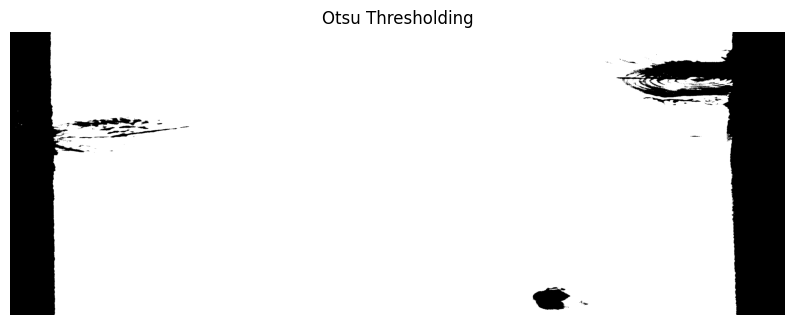

In [24]:
ret2,otsu = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
#parameters are image, threshold value, max value, type of thresholding

plt.figure(figsize=(10,10))
plt.imshow(otsu, 'gray')
plt.title("Otsu Thresholding")
plt.axis('off')
plt.show()

Since this methods performance compares to simple thresholding, there is no advantage to using this method.

## Canny Edge Detection

Canny edge detection is a 4 step algorithm that involves bluring, noise removal, smoothening, and special thresholding with an upper and lower bound. The purpose of the tools below is to illustrate that this method does not perform very well due to the amount of noise in our images.

In [25]:
def nothing(x):
    pass

img = cv2.imread(img_path)
img = cv2.blur(img,(5,5))
img = cv2.resize(img, (1200,800))

cv2.namedWindow('canny')
cv2.createTrackbar('lower', 'canny', 0, 255, nothing)
cv2.createTrackbar('upper', 'canny', 0, 255, nothing)

while(1):
    lower = cv2.getTrackbarPos('lower', 'canny')
    upper = cv2.getTrackbarPos('upper', 'canny')
    edges = cv2.Canny(img, lower, upper)
    cv2.imshow('canny', edges)
    k = cv2.waitKey(1) & 0xFF
    if k == 27: #quit with esc
        break

cv2.destroyAllWindows()

TypeError: 'tuple' object is not callable

KeyboardInterrupt: 